<a href="https://colab.research.google.com/github/22922511/House_price_prediction/blob/main/notebook/Bengaluru%20House%20price%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')

In [ ]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5821,Built-up Area,Ready To Move,Chamrajpet,2 Bedroom,NaN,1050,2.0,1.0,162.0
8780,Super built-up Area,Ready To Move,Hennur Gardens,3 BHK,PlhtsHe,1464,2.0,1.0,135.0
11472,Built-up Area,Ready To Move,Haralur Road,4 BHK,Oznzaes,4694,5.0,NaN,375.0
8588,Super built-up Area,18-Apr,Reliaable Tranquil Layout,2 BHK,Sariana,1256,2.0,1.0,65.0
5441,Plot Area,Ready To Move,Vidyaranyapura,3 Bedroom,NaN,462,3.0,NaN,38.0


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df=df.drop(columns=['availability','society','area_type','balcony'])

In [ ]:
df.sample(20)

,location,size,total_sqft,bath,price
2058,Hoskote,3 BHK,1250,3.0,50.00
4624,Kanakapura,2 BHK,945,2.0,47.00
5686,Jigani,2 BHK,914,2.0,49.00
891,Hennagara,2 BHK,823,2.0,28.00
3733,Ambalipura,3 BHK,1730,3.0,120.00
12362,Ramamurthy Nagar,2 BHK,935,2.0,39.00
11461,Banagiri Nagar,3 BHK,1500,2.0,120.00
10000,Kodbisanhalli,2 BHK,1245,1.0,60.00
11849,Bommasandra Industrial Area,2 BHK,1125,2.0,32.49
7580,Malleshpalya,2 BHK,1421,2.0,90.00


In [ ]:
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

##Extracted BHK vaue from size

In [ ]:
df['BHK']=df['size'].apply(lambda bhk : int(bhk.split()[0]))

In [ ]:
df.sample(5)

,location,size,total_sqft,bath,price,BHK
12434,Rajaji Nagar,2 BHK,1718,3.0,275.0,2
12926,Sarjapur Road,3 BHK,1691,3.0,100.0,3
3755,Raja Rajeshwari Nagar 5th Stage,3 BHK,1320,2.0,73.0,3
3272,Mangammanapalya,2 BHK,1058,2.0,60.0,2
10109,Kengeri Satellite Town,5 BHK,1200,5.0,70.0,5


## finding the average of total_sqft value of range given

In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
## check to float
def check_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df[~df['total_sqft'].apply(check_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [ ]:
## taking avearge of range
def to_float(x):
  tokn=x.split('-')
  if len(tokn)==2 :
    return (float(tokn[0])+(float(tokn[1])))/2
  try :
    return float(x)
  except:
    return None

In [ ]:
df['total_sqft']=df['total_sqft'].apply(to_float)

In [ ]:
df.iloc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
BHK,4


In [ ]:
df.sample(5)

,location,size,total_sqft,bath,price,BHK
10986,Kanakpura Road,3 BHK,1300.0,3.0,64.0,3
12834,Electronic City,2 BHK,1070.0,2.0,48.0,2
2245,Kashi Nagar,2 BHK,1200.0,2.0,50.0,2
11843,Kundalahalli,2 BHK,1047.0,2.0,91.0,2
798,Thanisandra,2 BHK,1185.0,2.0,42.6,2


In [ ]:
df1=df.copy()

In [ ]:
df1=df1.dropna()

In [ ]:
df1.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0
BHK,0


##Feature Engineering

## Creating a new featue price per square feet area

In [ ]:
df1['price_per_sqft']=df1['price']*100000/df['total_sqft']

In [ ]:
df1.sample(5)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
10751,Marathahalli,2 BHK,1135.0,2.0,60.00,2,5286.343612
9339,Jakkur Plantation,3 BHK,1719.0,3.0,110.00,3,6399.069226
2301,Hosa Road,2 BHK,1104.0,2.0,36.43,2,3299.818841
12968,Marathahalli,3 BHK,1485.0,2.0,90.00,3,6060.606061
2068,Brookefield,3 BHK,1476.0,3.0,105.00,3,7113.821138


## we have around 1300 different value in location so to replacing it with other if count of any location less then 15

In [ ]:
location_count=df1['location'].value_counts().reset_index()
location_count.columns = ['location', 'count']

In [ ]:
location_less_then_10=location_count[location_count['count']< 15].location.tolist()

In [ ]:
df1.location=df1['location'].apply(lambda x : 'others' if x in location_less_then_10 else x )

In [ ]:
df1['location'].value_counts()

,count
location,
others,3587
Whitefield,532
Sarjapur Road,392
Electronic City,302
Kanakpura Road,264
...,...
Kodihalli,15
Varthur Road,15
Benson Town,15


In [ ]:
print(df1.shape)
df1.sample(2)

(13200, 7)


,location,size,total_sqft,bath,price,BHK,price_per_sqft
1065,Hebbal,4 BHK,3900.0,4.0,410.0,4,10512.820513
10723,Kannamangala,3 BHK,1536.0,3.0,107.0,3,6966.145833


## for typically one bedroom sqft range from 300 to 600 in bengaluru from source nobrocker
https://www.nobroker.in/1bhk-flats-for-rent-in-bangalore_bangalore#signup-login

In [ ]:
df2=df1[(df1['total_sqft']/df1['BHK'])>=300]

In [ ]:
df2.shape

(12456, 7)

In [ ]:
df2['price_per_sqft'].describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


## outlier removing

In [ ]:
def removes_outliers_location(df):
    df_new = pd.DataFrame()
    c=0;
    for key, subdf in df.groupby('location'):
         q1=subdf['price_per_sqft'].quantile(.25)
         q3=subdf['price_per_sqft'].quantile(.75)
         IQR=q3-q1
         lower_bound = q1 - 1.5 * IQR
         upper_bound = q3 + 1.5 * IQR
         df_per_key=subdf[(subdf['price_per_sqft'] >=lower_bound) & (subdf['price_per_sqft']<=upper_bound)]
         df_new=pd.concat([df_new ,df_per_key],ignore_index=True)
         print(f"{key}: {len(subdf) - len(df_per_key)} rows removed")


    return df_new


In [ ]:
def removes_outliers_bhk(df):
    df_new = pd.DataFrame()
    c=0;
    for key, subdf in df.groupby('BHK'):
         q1=subdf['price_per_sqft'].quantile(.25)
         q3=subdf['price_per_sqft'].quantile(.75)
         IQR=q3-q1
         lower_bound = q1 - 1.5 * IQR
         upper_bound = q3 + 1.5 * IQR
         df_per_key=subdf[(subdf['price_per_sqft'] >=lower_bound) & (subdf['price_per_sqft']<=upper_bound)]
         df_new=pd.concat([df_new ,df_per_key],ignore_index=True)
         print(f"{key}: {len(subdf) - len(df_per_key)} rows removed")


    return df_new


In [ ]:
df3=removes_outliers_location(df2)
df3=removes_outliers_bhk(df3)


1st Phase JP Nagar: 3 rows removed
2nd Stage Nagarbhavi: 2 rows removed
5th Phase JP Nagar: 2 rows removed
6th Phase JP Nagar: 0 rows removed
7th Phase JP Nagar: 4 rows removed
8th Phase JP Nagar: 7 rows removed
9th Phase JP Nagar: 2 rows removed
Abbigere: 5 rows removed
Akshaya Nagar: 8 rows removed
Ambalipura: 3 rows removed
Ambedkar Nagar: 5 rows removed
Amruthahalli: 2 rows removed
Anandapura: 0 rows removed
Ananth Nagar: 3 rows removed
Anekal: 3 rows removed
Anjanapura: 3 rows removed
Ardendale: 1 rows removed
Arekere: 1 rows removed
Attibele: 6 rows removed
BTM 2nd Stage: 1 rows removed
BTM Layout: 2 rows removed
Babusapalaya: 1 rows removed
Balagere: 1 rows removed
Banashankari: 8 rows removed
Banashankari Stage II: 1 rows removed
Banashankari Stage III: 2 rows removed
Banashankari Stage VI: 3 rows removed
Banaswadi: 2 rows removed
Bannerghatta: 0 rows removed
Bannerghatta Road: 8 rows removed
Basavangudi: 1 rows removed
Basaveshwara Nagar: 0 rows removed
Battarahalli: 1 rows re

In [ ]:
df3.shape

(11057, 7)

In [ ]:
df3.sample(5)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
6087,Basavangudi,3 BHK,1850.0,3.0,150.0,3,8108.108108
3118,Marathahalli,2 BHK,1146.0,2.0,70.0,2,6108.202443
4771,others,2 BHK,1352.0,2.0,85.0,2,6286.982249
10411,Thigalarapalya,4 BHK,3122.0,6.0,245.0,4,7847.533632
8192,Sarjapur Road,3 BHK,1550.0,2.0,98.0,3,6322.580645


## removing outlier form bathroom
##what if bathroom =16

In [ ]:
df3[df3['bath']>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
11050,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
11051,others,10 BHK,4000.0,12.0,160.0,10,4000.000000
11054,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
11055,others,13 BHK,5425.0,13.0,275.0,13,5069.124424
11056,others,16 BHK,10000.0,16.0,550.0,16,5500.000000


In [ ]:
df4=df3[df3['bath']<=df3['BHK']+1]
print(f'{len(df3)-len(df4)} removed')

99 removed


In [ ]:
df4.shape

(10958, 7)

(array([7.115e+03, 2.760e+03, 9.700e+02, 6.100e+01, 4.000e+01, 8.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

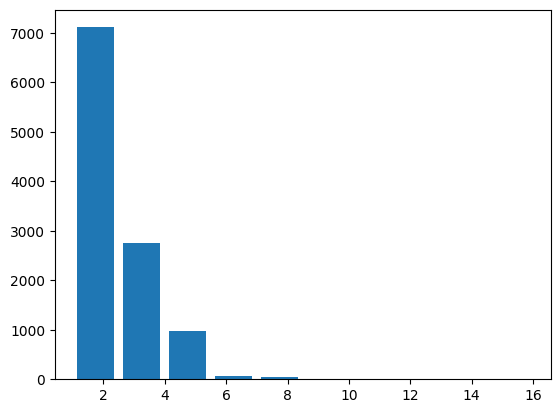

In [ ]:
plt.hist(df4['bath'],rwidth=.8)

## droped  the some fearure including size

In [ ]:
df5=df4.drop(columns=['size','price_per_sqft'])

In [ ]:
df5.sample(5)

,location,total_sqft,bath,price,BHK
2039,Hebbal,1162.0,2.0,59.00,2
4012,Uttarahalli,1175.0,2.0,47.00,2
6302,CV Raman Nagar,1590.0,2.0,85.00,3
5459,others,1170.0,2.0,53.11,2
6040,Bannerghatta Road,1450.0,3.0,44.00,3


In [ ]:
df5['location']=df5['location'].apply(lambda x : x.lower())

 ##One hot encoding on location

In [ ]:
coded_df=pd.get_dummies(df5.location)
coded_df.sample(2)

,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,akshaya nagar,ambalipura,ambedkar nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
3734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df6=pd.concat([df5,coded_df.drop(columns='others')],axis='columns')

In [ ]:
df6.sample(5)

,location,total_sqft,bath,price,BHK,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
10773,others,2000.0,3.0,180.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10156,hosur road,2835.0,4.0,241.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2408,jakkur,1290.0,2.0,80.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9840,others,1507.0,3.0,80.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
229,kengeri,416.0,1.0,18.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df6.drop(columns=['location'],inplace=True)

In [ ]:
df6.sample(5)

,total_sqft,bath,price,BHK,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
10036,3056.0,5.0,100.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7337,1542.0,2.0,85.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9848,1318.0,3.0,56.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3337,1210.0,2.0,80.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2847,918.0,2.0,27.54,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df6.shape

(10958, 187)

In [ ]:
X=df6.drop(columns=['price'])
Y=df6['price']

In [ ]:
print(X.shape,Y.shape)

(10958, 186) (10958,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=.2,random_state=20)

In [ ]:
print(f'train size {X_train.shape}: test size {X_test.shape}')

train size (8766, 186): test size (2192, 186)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.722511180088796

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree.score(X_test,y_test)

0.6137207224117275

In [ ]:
from sklearn.linear_model import Lasso, Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge.score(X_test,y_test)

0.7230223200685939

In [ ]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.681141245028892

In [ ]:
X_test.sample()

,total_sqft,bath,BHK,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
1603,660.0,1.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
length_ip=len(X_test.columns)
data_columns=X_test.columns

In [ ]:
def predict(total_sqft,bath,bhk,location):
 x=np.zeros(length_ip)
 location=location.lower()
 index_of_location=np.where(data_columns==location)[0][0]
 x[0]=total_sqft
 x[1]=bath
 x[2]=bhk
 x[index_of_location]=1
 x_df = pd.DataFrame([x], columns=data_columns)
 return model.predict(x_df)[0]

In [ ]:
predict(60000,2,4,'CV Raman Nagar')

np.float64(3424.060565332177)

##Importing model

In [ ]:
import pickle
with open('House_price_prediction_model.pkl','wb') as f:
   pickle.dump(model,f)


In [ ]:
import json
columns_name ={
    'columns':[x for x in data_columns]
}

with open('columns_name.json','w') as f:
  json.dump(columns_name,f)


In [ ]:
columns_name['columns'].index('panathur')

147